In [7]:
import models.models as models
import warnings

warnings.filterwarnings("ignore")

# Analyse dataset

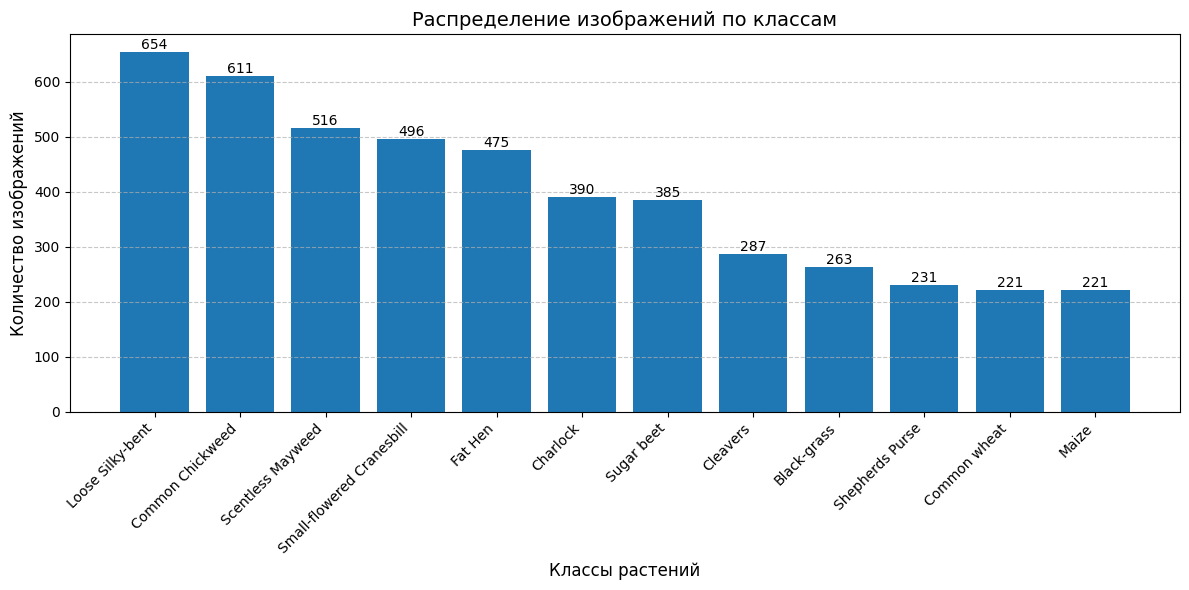

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

train_path = Path('data/train')

class_counts = {}
for class_dir in train_path.iterdir():
    if class_dir.is_dir():
        class_name = class_dir.name
        num_images = len(list(class_dir.glob('*.png')))
        class_counts[class_name] = num_images

class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.title('Распределение изображений по классам', fontsize=14)
plt.xlabel('Классы растений', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [9]:
from PIL import Image
import numpy as np

widths = []
heights = []
ratios = []

for class_dir in train_path.iterdir():
    if class_dir.is_dir():
        for img_path in class_dir.glob('*.png'):
            with Image.open(img_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
                ratios.append(width / height)

size_stats = pd.DataFrame({
    'Width': widths,
    'Height': heights,
    'Ratio (W/H)': ratios
}).describe()

print(size_stats)

             Width       Height  Ratio (W/H)
count  4750.000000  4750.000000  4750.000000
mean    371.465895   370.730105     1.000364
std     323.275012   318.649607     0.009373
min      49.000000    49.000000     0.943368
25%     140.000000   140.000000     1.000000
50%     266.500000   266.500000     1.000000
75%     507.750000   507.000000     1.000000
max    3991.000000  3457.000000     1.332083


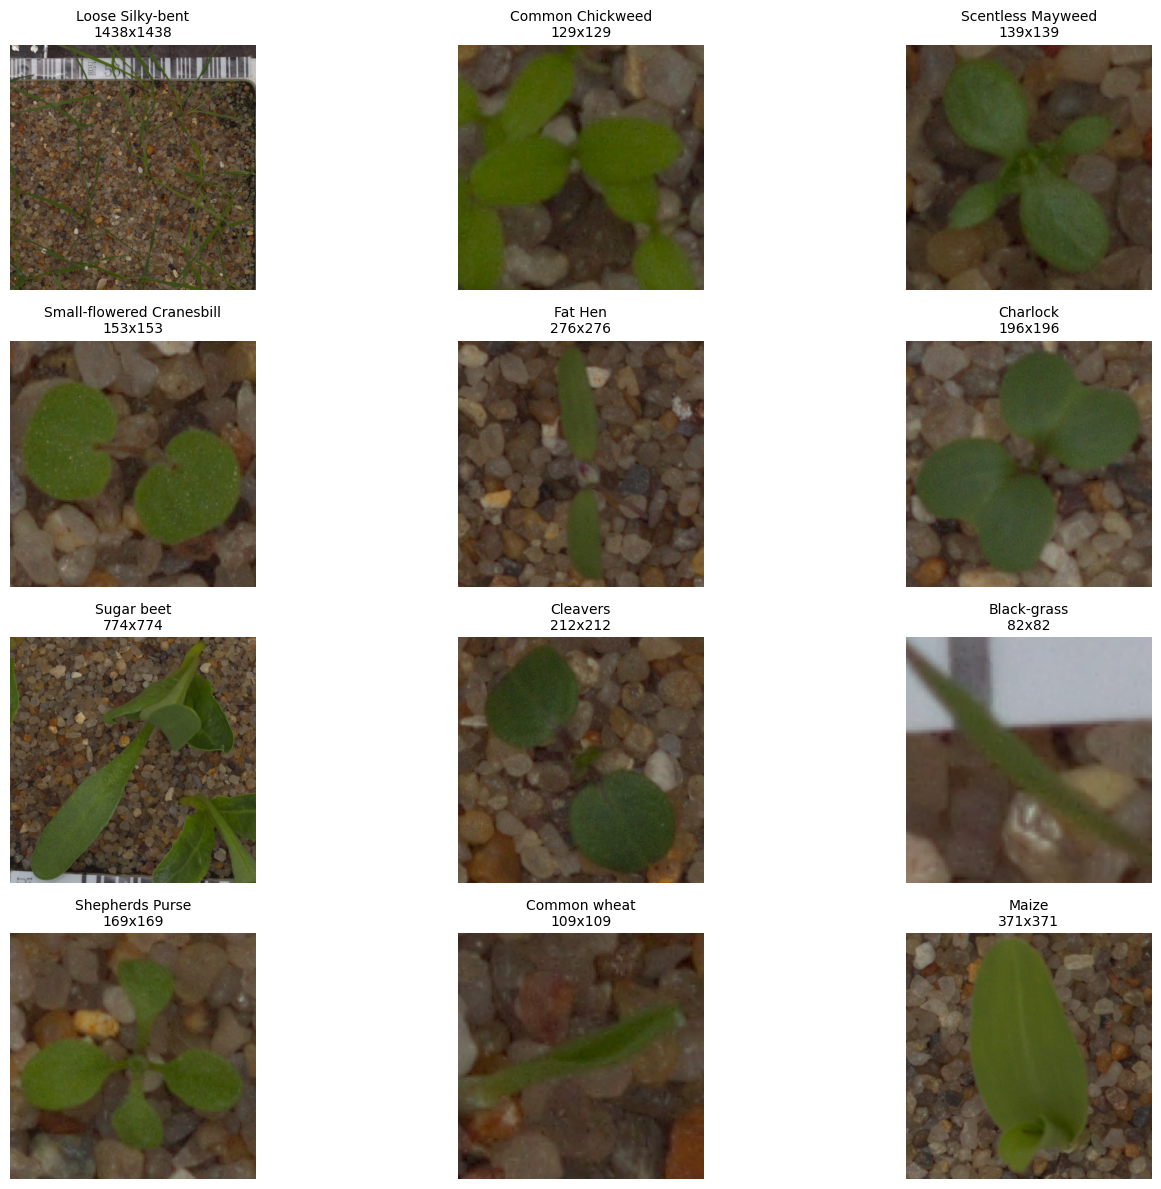

In [10]:
import random

plt.figure(figsize=(15, 12))
for i, class_name in enumerate(class_counts.keys()):
    # Выбираем случайное изображение из класса
    class_dir = train_path / class_name
    img_path = random.choice(list(class_dir.glob('*.png')))

    plt.subplot(4, 3, i+1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"{class_name}\n{img.size[0]}x{img.size[1]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

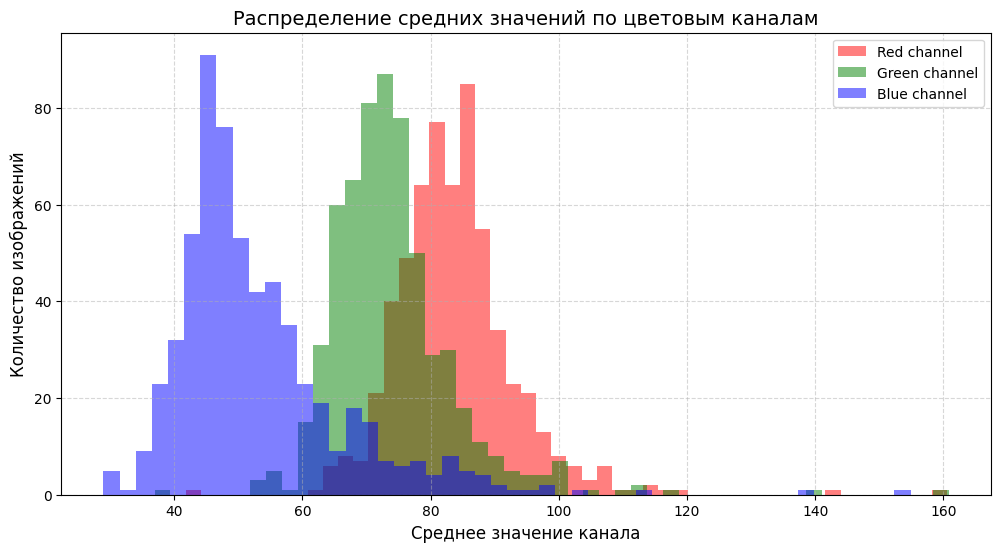

In [11]:
 mean_r = []
mean_g = []
mean_b = []

for class_dir in train_path.iterdir():
    if class_dir.is_dir():
        for img_path in list(class_dir.glob('*.png'))[:50]:  # берем по 50 из каждого класса для скорости
            with Image.open(img_path) as img:
                img_array = np.array(img)
                if len(img_array.shape) == 3:  # проверяем, что изображение цветное
                    mean_r.append(np.mean(img_array[:,:,0]))
                    mean_g.append(np.mean(img_array[:,:,1]))
                    mean_b.append(np.mean(img_array[:,:,2]))

# Визуализация распределения цветовых каналов
plt.figure(figsize=(12, 6))
plt.hist(mean_r, bins=50, alpha=0.5, color='red', label='Red channel')
plt.hist(mean_g, bins=50, alpha=0.5, color='green', label='Green channel')
plt.hist(mean_b, bins=50, alpha=0.5, color='blue', label='Blue channel')
plt.title('Распределение средних значений по цветовым каналам', fontsize=14)
plt.xlabel('Среднее значение канала', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Resnet

#### Init model

In [12]:
resnetModel = models.ResnetModel()

#### Train and save model

Обучающих изображений: 3800, валидационных: 950
Классы: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


Эпоха 1/10: 100%|██████████| 119/119 [01:55<00:00,  1.03it/s, loss=0.839, acc=71.4]


Эпоха 1/10: Потери 0.8390, Вал. потери 2.8368, Точность 71.39%, Вал. точность 44.95%


Эпоха 2/10: 100%|██████████| 119/119 [01:54<00:00,  1.04it/s, loss=0.471, acc=83.3]


Эпоха 2/10: Потери 0.4709, Вал. потери 1.0165, Точность 83.29%, Вал. точность 71.05%


Эпоха 3/10: 100%|██████████| 119/119 [02:00<00:00,  1.01s/it, loss=0.361, acc=86.8]


Эпоха 3/10: Потери 0.3609, Вал. потери 0.5157, Точность 86.84%, Вал. точность 79.37%


Эпоха 4/10: 100%|██████████| 119/119 [01:54<00:00,  1.04it/s, loss=0.306, acc=89.1]


Эпоха 4/10: Потери 0.3062, Вал. потери 0.3852, Точность 89.08%, Вал. точность 86.21%


Эпоха 5/10: 100%|██████████| 119/119 [01:55<00:00,  1.03it/s, loss=0.24, acc=91.4] 


Эпоха 5/10: Потери 0.2404, Вал. потери 0.4729, Точность 91.45%, Вал. точность 82.74%


Эпоха 6/10: 100%|██████████| 119/119 [02:05<00:00,  1.06s/it, loss=0.224, acc=91.9]


Эпоха 6/10: Потери 0.2243, Вал. потери 0.4047, Точность 91.95%, Вал. точность 86.53%


Эпоха 7/10: 100%|██████████| 119/119 [02:04<00:00,  1.04s/it, loss=0.201, acc=93.1]


Эпоха 7/10: Потери 0.2011, Вал. потери 0.8721, Точность 93.13%, Вал. точность 76.11%


Эпоха 8/10: 100%|██████████| 119/119 [01:57<00:00,  1.01it/s, loss=0.226, acc=91.8]


Эпоха 8/10: Потери 0.2263, Вал. потери 0.3115, Точность 91.82%, Вал. точность 90.00%


Эпоха 9/10: 100%|██████████| 119/119 [01:57<00:00,  1.01it/s, loss=0.215, acc=92.3]


Эпоха 9/10: Потери 0.2150, Вал. потери 0.4287, Точность 92.29%, Вал. точность 87.26%


Эпоха 10/10: 100%|██████████| 119/119 [01:58<00:00,  1.01it/s, loss=0.176, acc=93.9]


Эпоха 10/10: Потери 0.1761, Вал. потери 0.3408, Точность 93.92%, Вал. точность 88.74%


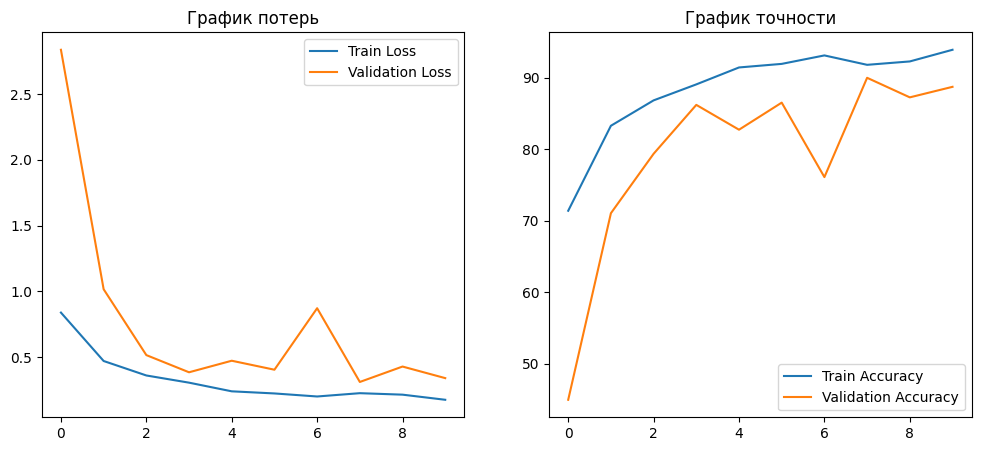

                           precision    recall  f1-score   support

              Black-grass       0.59      0.62      0.60        39
                 Charlock       0.78      0.99      0.87        79
                 Cleavers       0.93      0.90      0.91        48
         Common Chickweed       0.93      0.93      0.93       123
             Common wheat       0.92      0.88      0.90        51
                  Fat Hen       0.94      0.95      0.95       106
         Loose Silky-bent       0.88      0.90      0.89       131
                    Maize       0.89      0.92      0.91        37
        Scentless Mayweed       0.93      0.99      0.96       112
          Shepherds Purse       1.00      0.47      0.64        47
Small-flowered Cranesbill       1.00      0.86      0.92        97
               Sugar beet       0.86      0.94      0.90        80

                 accuracy                           0.89       950
                macro avg       0.89      0.86      0.86    

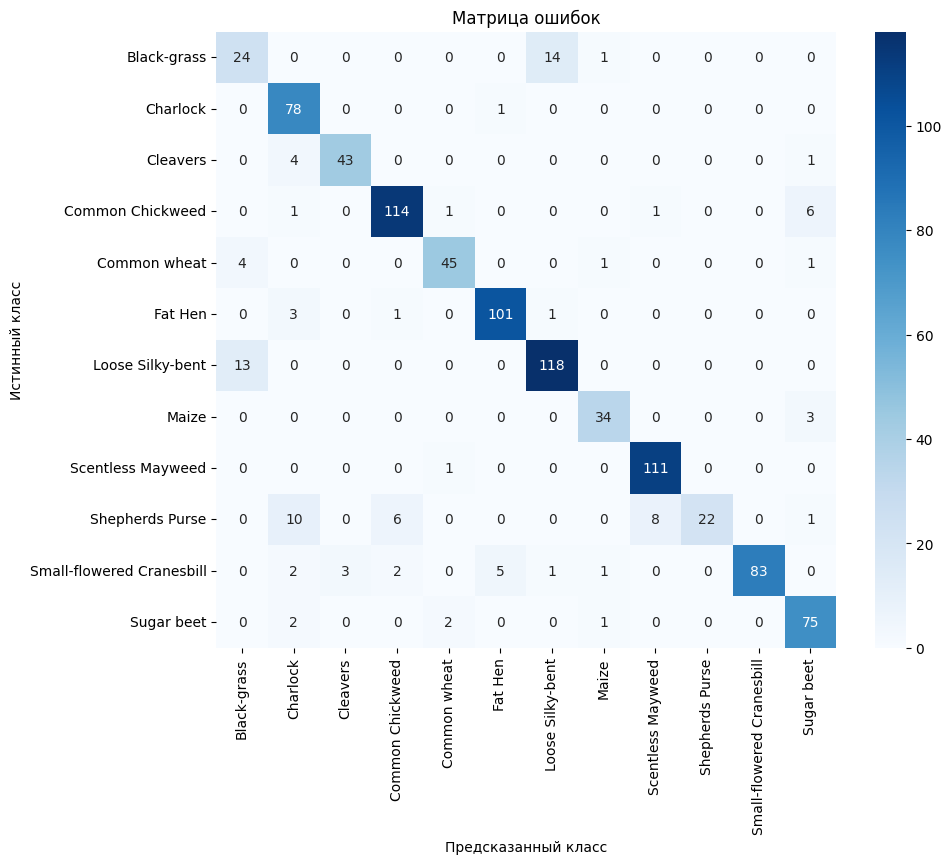

Модель и файл classes.json успешно сохранены в D:\GitHub\Course_paper_3_year\models\resnet\saved_model


In [13]:
resnetModel.train()

#### Test model (only for kaggle)

In [14]:
resnetModel.test_model()

test_model ⠋
Файл submission.csv успешно создан.
test_model ✓ Готово!
Время выполнения test_model - 00:09



# Sequential Model

In [15]:
sequentialModel = models.SequentialModel()
sequentialModel.train()

Обучающих изображений: 3800, валидационных: 950
Классы: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 

# Sequential Advanced Model

Обучающих изображений: 3800, валидационных: 950
Классы: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                             

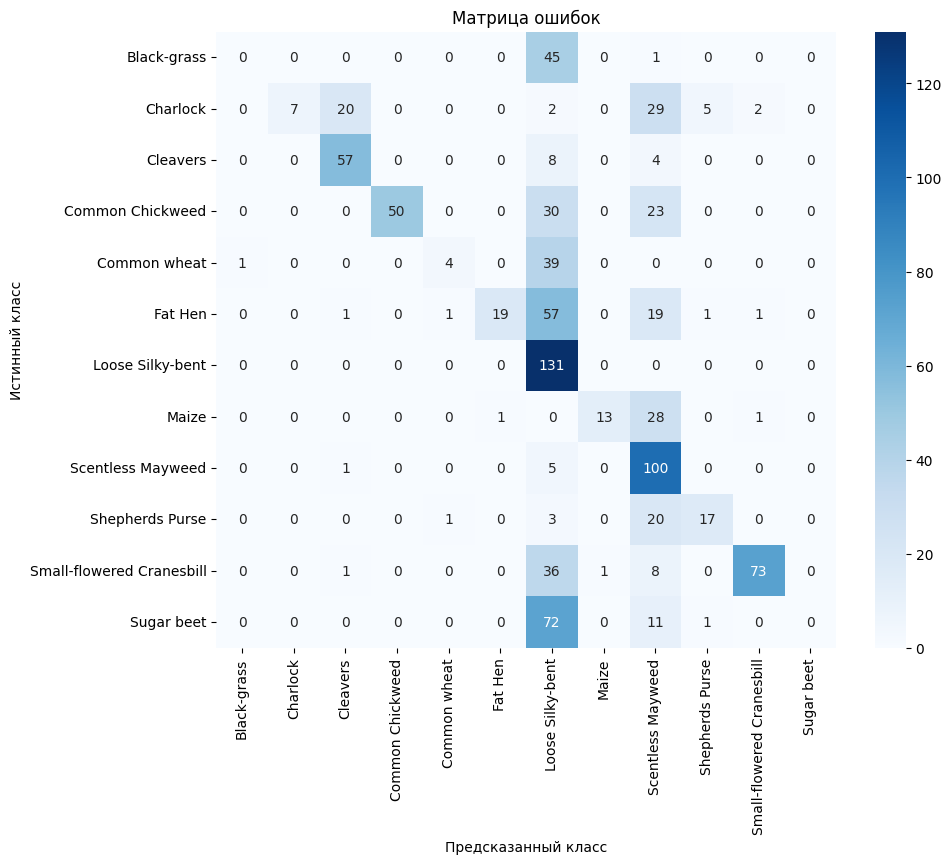

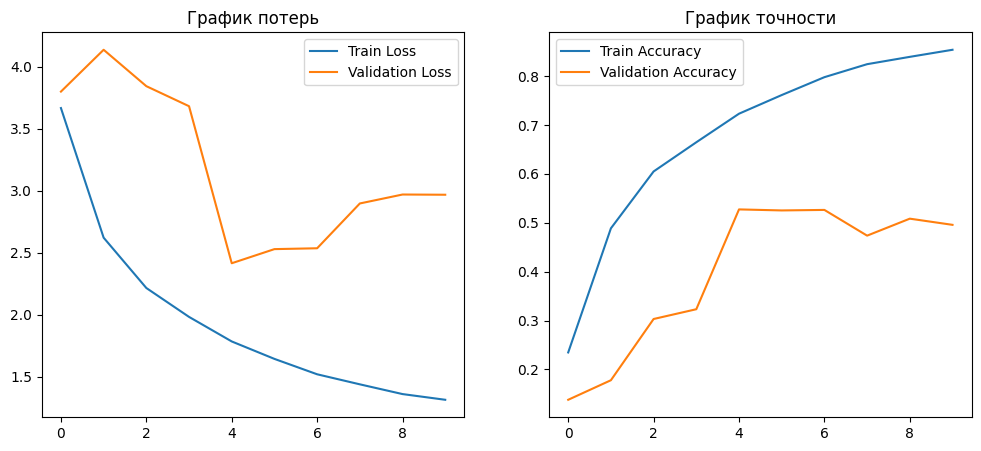

In [16]:
sequentialAdvancedModel = models.SequentialAdvancedModel()
sequentialAdvancedModel.train()

# Random Forest Classifier Model

Обучающих изображений: 3800, валидационных: 950
Классы: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
Обучение Random Forest...

Classification Report:
                           precision    recall  f1-score   support

              Black-grass       0.47      0.18      0.26        51
                 Charlock       0.69      0.53      0.60        87
                 Cleavers       0.60      0.52      0.56        56
         Common Chickweed       0.69      0.83      0.75       114
             Common wheat       0.25      0.02      0.04        42
                  Fat Hen       0.51      0.40      0.45       100
         Loose Silky-bent       0.37      0.81      0.51       133
                    Maize       1.00      0.23      0.37        35
        Scentless Mayweed       0.54      0.75      0.63       100
          Shepherds Purs

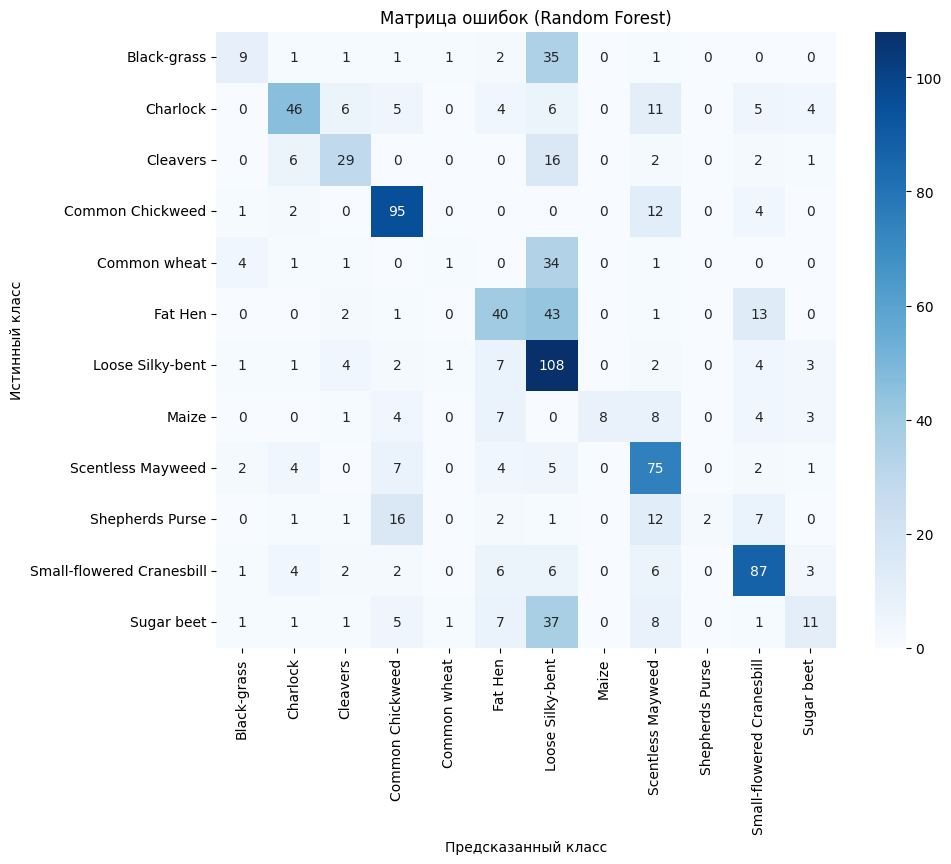

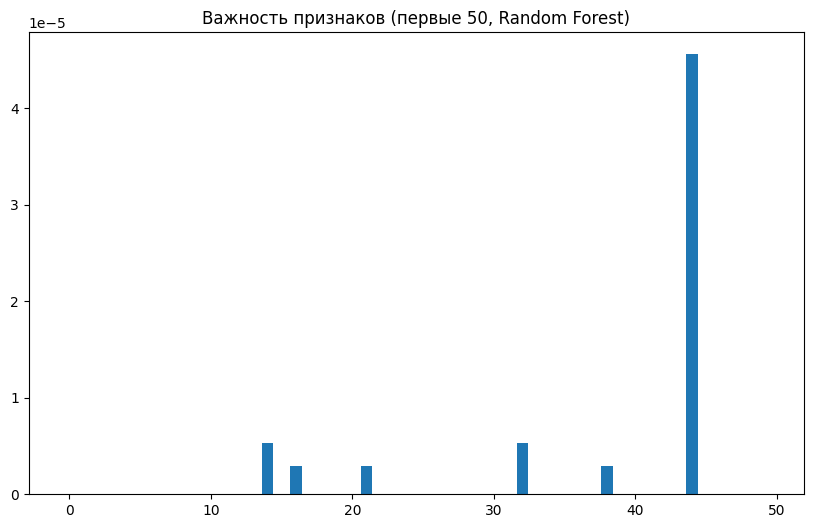

In [17]:
randomForestClassifierModel = models.RandomForestClassifier()
randomForestClassifierModel.train()